# Cual es la mejor estrategia para adivinar?
***Por Miguel Escalona***

In [20]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


from IPython.display import Image

# Adivina Quien es!

El juego de adivina quien es, consiste en adivinar el personaje que tu oponente a seleccionado antes de que él/ella adivine el tuyo.
La dinámica del juego es:
* Cada jugador elije un personaje al azar 
* Por turnos, cada jugador realiza preguntas de si o no, e intenta adivinar el personaje del oponente.
* Las preguntas válidas están basadas en la apariencia de los personajes y deberían ser fáciles de responder.
* Ejemplo de pregunta válida: Tiene el cabello negro?
* Ejemplo de pregunta no válida: Luce como un ex-presidiario?

A continuación, cargamos el tablero con los personajes.

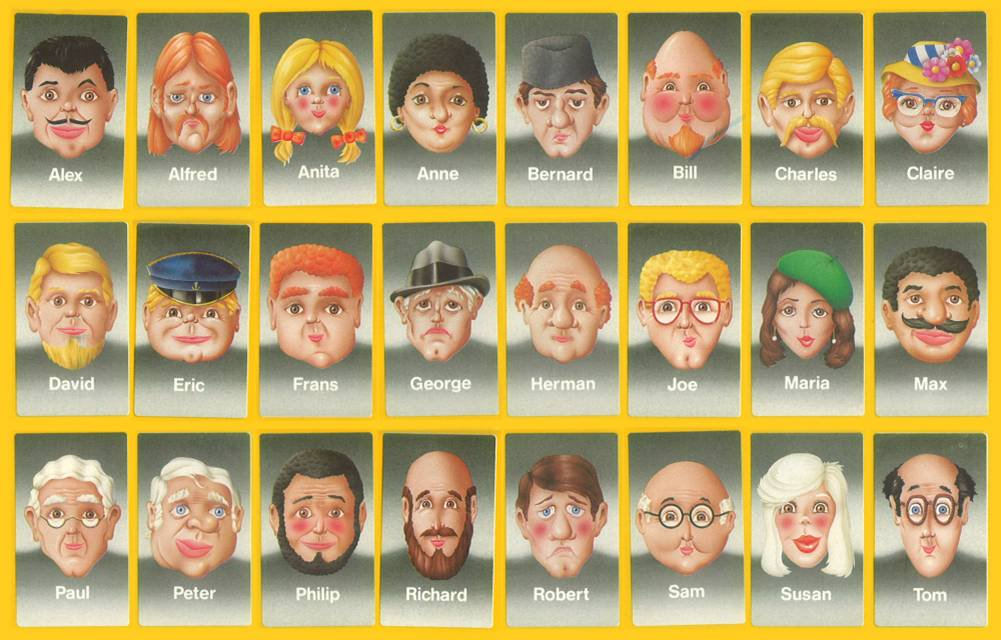

In [21]:
Image('data/guess_who_board.jpg', width=700)

# Cargando los datos

Para la carga de datos usaremos la función read_csv de pandas. Pandas cuenta con un amplio listado de funciones para la carga de datos. Mas informacion en la [documentación de la API.](http://pandas.pydata.org/pandas-docs/stable/io.html) 

In [22]:
df = pd.read_csv('data/guess_who.csv', index_col='observacion')
df.head()

,lleva gafas,usa sarcillos,es mujer,color de cabello,peinado partido,cabello rizado,lleva sombrero,calvo,lleva algo en el cabello,cabello largo,boca grande,nariz grande,pomulos rojos,ojos azules,mirada triste,vello facial,bigote,barba,NOMBRE
observacion,,,,,,,,,,,,,,,,,,,
1,False,False,False,Negro,False,False,False,False,False,False,True,False,False,False,False,True,True,False,ALEX
2,False,False,False,Rojo,True,False,False,False,False,True,False,False,False,True,True,True,True,False,ALFRED
3,False,False,True,Rubio,True,False,False,False,True,True,False,False,True,True,False,False,False,False,ANITA
4,False,True,True,Negro,False,True,False,False,False,False,False,False,False,False,False,False,False,False,ANNE
5,False,False,False,Marron,False,False,True,False,True,False,False,True,False,False,True,False,False,False,BERNARD


# Cuantos personajes tenemos con cada caracteristica?

In [23]:
#Separamos los tipos de variables
categorical_var = 'color de cabello'
binary_vars = list(set(df.keys()) - set([categorical_var, 'NOMBRE']))

In [24]:
# Para las variables booleanas calculamos la suma
df[binary_vars].sum()


es mujer                     5
cabello largo                4
peinado partido              6
lleva sombrero               5
vello facial                 8
mirada triste                4
usa sarcillos                2
bigote                       5
lleva gafas                  5
calvo                        5
cabello rizado               6
nariz grande                 5
boca grande                 10
pomulos rojos                5
barba                        4
lleva algo en el cabello     5
ojos azules                  5
dtype: int64

In [25]:
# Para las variables categoricas, observamos la frecuencia de cada categoría
df[categorical_var].value_counts()

Rubio     5
Blanco    5
Rojo      5
Marron    5
Negro     4
Name: color de cabello, dtype: int64

### Pregunta! Cuantas personas tienen la boca grande y cuantos de estos son hombres?

In [26]:
#  *** Escribe tu codigo aquí ***





In [27]:
labels = df['NOMBRE']
del df['NOMBRE'] 
df.head()

,lleva gafas,usa sarcillos,es mujer,color de cabello,peinado partido,cabello rizado,lleva sombrero,calvo,lleva algo en el cabello,cabello largo,boca grande,nariz grande,pomulos rojos,ojos azules,mirada triste,vello facial,bigote,barba
observacion,,,,,,,,,,,,,,,,,,
1,False,False,False,Negro,False,False,False,False,False,False,True,False,False,False,False,True,True,False
2,False,False,False,Rojo,True,False,False,False,False,True,False,False,False,True,True,True,True,False
3,False,False,True,Rubio,True,False,False,False,True,True,False,False,True,True,False,False,False,False
4,False,True,True,Negro,False,True,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,Marron,False,False,True,False,True,False,False,True,False,False,True,False,False,False


In [39]:
labels

observacion
1        ALEX
2      ALFRED
3       ANITA
4        ANNE
5     BERNARD
6        BILL
7     CHARLES
8      CLAIRE
9       DAVID
10       ERIC
11      FRANS
12     GEORGE
13     HERMAN
14        JOE
15      MARIA
16        MAX
17       PAUL
18      PETER
19     PHILIP
20    RICHARD
21     ROBERT
22        SAM
23      SUSAN
24        TOM
Name: NOMBRE, dtype: object

# Codificacion de variables categoricas

In [28]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=False)
ab=vectorizer.fit_transform(df.to_dict('records'))
dft = pd.DataFrame(ab, columns=vectorizer.get_feature_names())
dft.head()

,barba,bigote,boca grande,cabello largo,cabello rizado,calvo,color de cabello=Blanco,color de cabello=Marron,color de cabello=Negro,color de cabello=Rojo,...,lleva algo en el cabello,lleva gafas,lleva sombrero,mirada triste,nariz grande,ojos azules,peinado partido,pomulos rojos,usa sarcillos,vello facial
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# Entrenando un arbol de decision

In [29]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=42)
classifier.fit(dft, labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='random')

# Obtencion de los pesos de cada feature

In [44]:
feat = pd.DataFrame(index=dft.keys(), data=classifier.feature_importances_, columns=['score'])
feat = feat.sort_values(by='score', ascending=False)

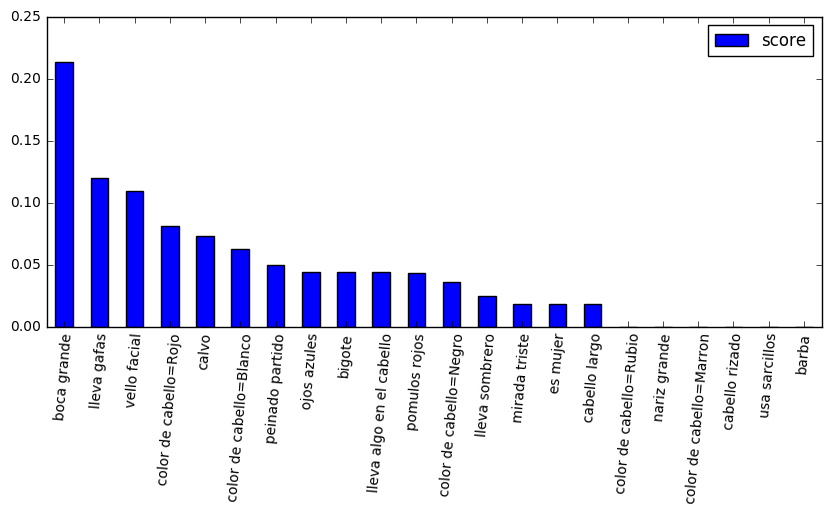

In [45]:
feat.plot(kind='bar',rot=85,figsize=(10,4),)

# Bonus: Visualizando el arbol, requiere graphviz
```
conda install graphviz
```

In [109]:
from sklearn.tree import export_graphviz
dotfile = open('guess_who_tree.dot', 'w')
export_graphviz(
    classifier, 
    out_file = dotfile, 
    filled=True, 
    feature_names = dft.columns, 
    class_names=list(labels), 
    rotate=True, 
    max_depth=1, 
    rounded=True,
)
dotfile.close()

In [46]:
!dot -Tpng guess_who_tree.dot -o guess_who_tree.png 

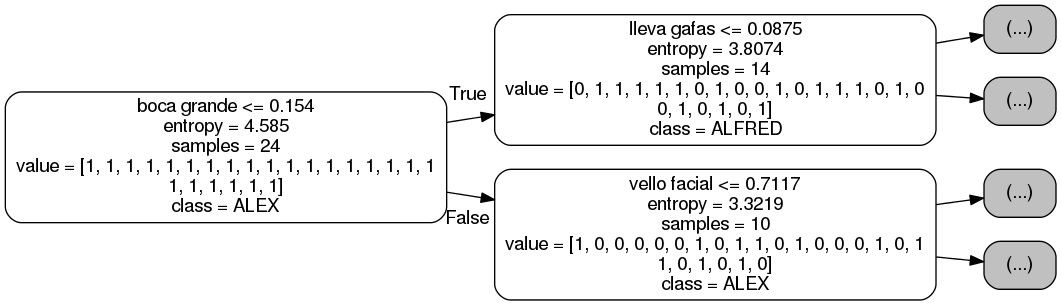

In [47]:
Image('guess_who_tree.png', width=1000)